In [38]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:",r"C:\Users\Asus\OneDrive\Desktop\email_spam")

Path to dataset files: C:\Users\Asus\OneDrive\Desktop\email_spam


In [39]:
import os
import pandas as pd
import numpy as np
df = pd.read_csv(os.path.join(path, "spam.csv"), encoding='latin-1')

In [40]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [41]:
df.shape

(5572, 5)

In [42]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [43]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [44]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
df.columns = ['label', 'message']

In [46]:
df.isnull().sum()  

label      0
message    0
dtype: int64

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [49]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
df.shape

(5169, 2)

In [51]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

Data Preprocessing

([<matplotlib.patches.Wedge at 0x1b51d665e20>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.4%'),
  Text(0.553363565906573, -0.231924047755212, '12.6%')])

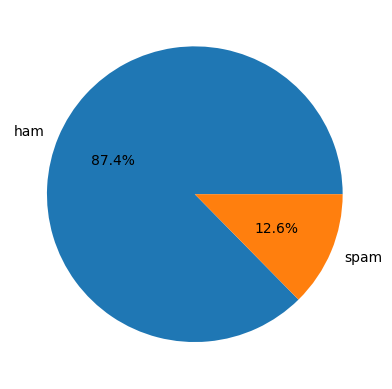

In [52]:
import matplotlib.pyplot as plt     

plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')

In [53]:
#data is imbalanced

In [54]:
import nltk

In [55]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
df['no_chars']=df['message'].apply(len)

In [57]:
df.head()

,label,message,no_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [58]:
import nltk  
nltk.download('punkt_tab')  

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [59]:
#no of words
df['no_words']= df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [60]:
#no of words
df['no_sentences']= df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [61]:
#ham sms
df[df['label'] == 0].describe()



,label,no_chars,no_words,no_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [62]:
#spam sms
df[df['label'] == 1].describe()

,label,no_chars,no_words,no_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [63]:
import seaborn as sns

<Axes: xlabel='no_chars', ylabel='Count'>

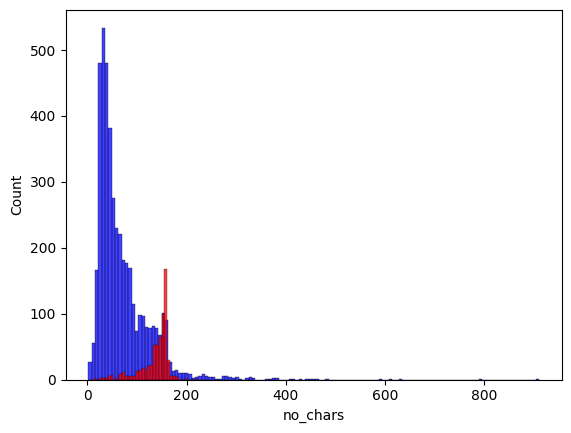

In [64]:
sns.histplot(df[df['label'] == 0]['no_chars'], color='blue', label='ham')
sns.histplot(df[df['label'] == 1]['no_chars'], color='red', label='spam')

<Axes: xlabel='no_words', ylabel='Count'>

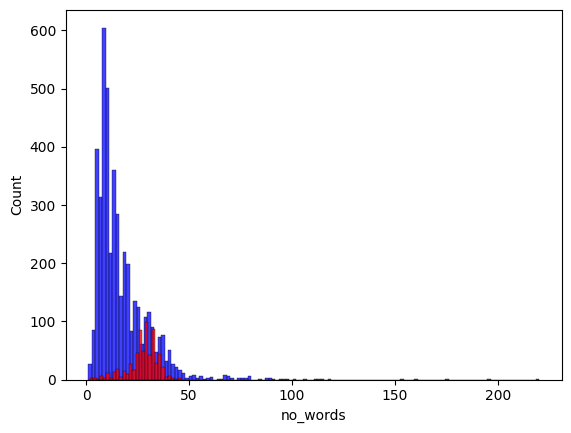

In [65]:
sns.histplot(df[df['label'] == 0]['no_words'], color='blue', label='ham')
sns.histplot(df[df['label'] == 1]['no_words'], color='red', label='spam')

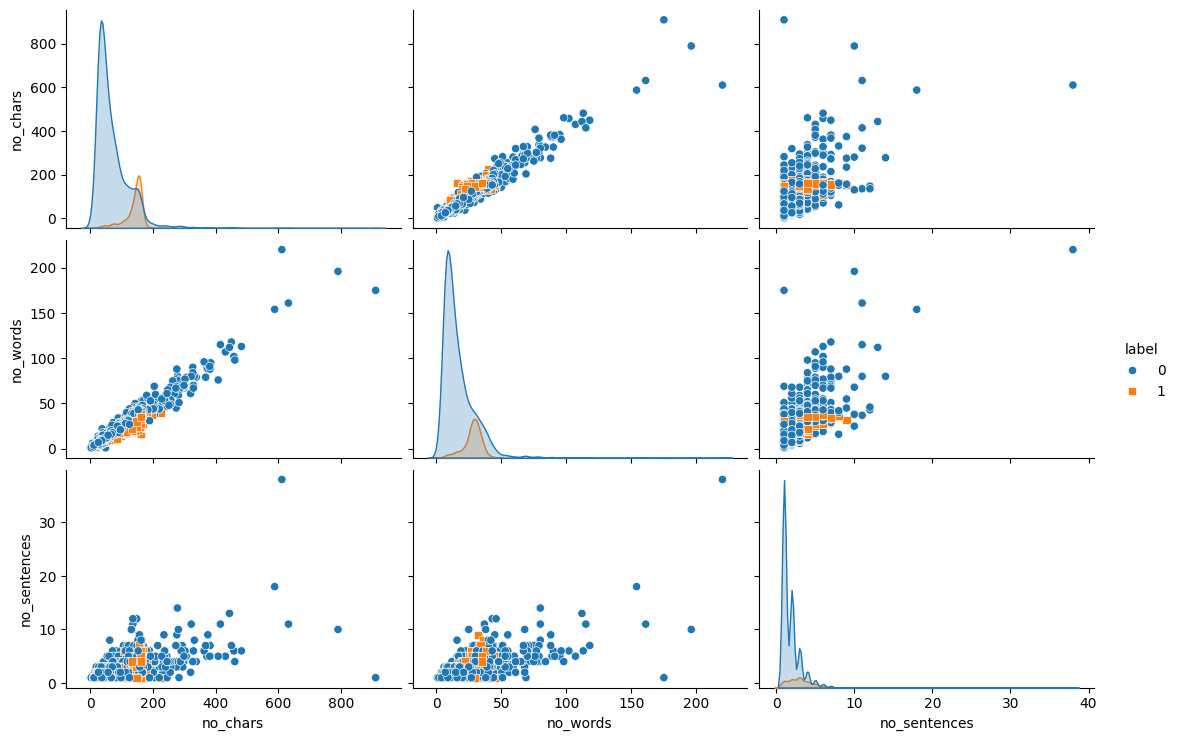

In [66]:
sns.pairplot(df, hue='label',markers=['o', 's'], height=2.5, aspect=1.5)

In [67]:
data = df[['no_chars', 'no_words', 'no_sentences', 'label']].copy()
data.corr()


,no_chars,no_words,no_sentences,label
no_chars,1.000000,0.965760,0.624139,0.384717
no_words,0.965760,1.000000,0.679971,0.262912
no_sentences,0.624139,0.679971,1.000000,0.263939
label,0.384717,0.262912,0.263939,1.000000


<Axes: >

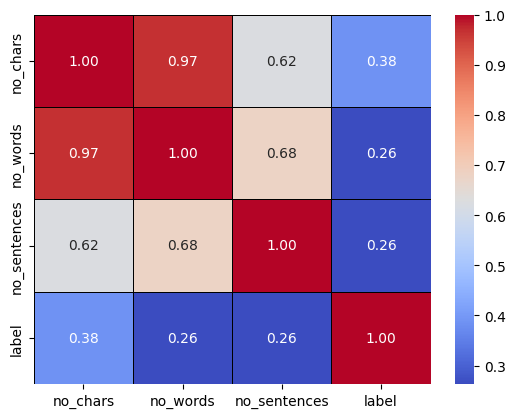

In [68]:
sns.heatmap(data.corr(),annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')

## Data Preprocessing

In [69]:
import nltk
from nltk.corpus import stopwords
import string

In [73]:
def transform_text(text):
    # lower case
    text = text.lower()
    
    #tokenize
    text = nltk.word_tokenize(text)
    
    # remove special characters and numbers
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
      
    #list cloning      
    text = y[:]
    y.clear()
    
    # remove stop words
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # stemming
    for i in text:
            y.append(ps.stem(i))
    
    return " ".join(y)

In [74]:
transform_text("HELLO  i love WORLD alpha %% @ the is not nice dancing")

'hello love world alpha nice danc'

In [72]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()   
ps.stem("dancing")

'danc'

In [78]:
df['transform_text'] = df['message'].apply(transform_text)

In [75]:
df.head()

,label,message,no_chars,no_words,no_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [76]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,background_color='white')

In [79]:
spam_wc = wc.generate(df[df['label'] == 1]['transform_text'].str.cat(sep=" "))


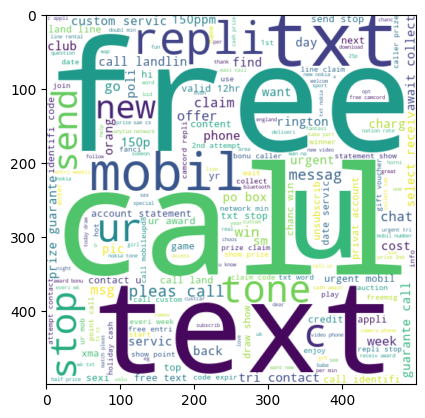

In [80]:
plt.imshow(spam_wc, interpolation='bilinear')

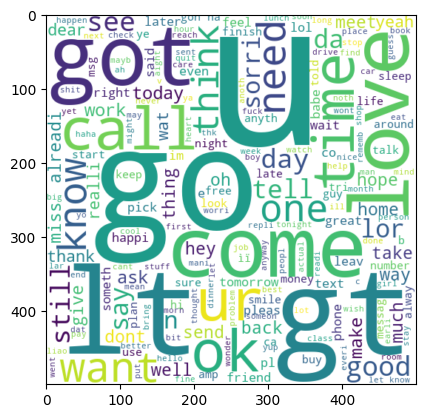

In [81]:
ham_wc = wc.generate(df[df['label'] == 0]['transform_text'].str.cat(sep=" "))
plt.imshow(ham_wc, interpolation='bilinear')

In [82]:
df.head()

,label,message,no_chars,no_words,no_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [86]:
spam_corpus = []
for msg in df[df['label'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
        

In [88]:
from collections import Counter 
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

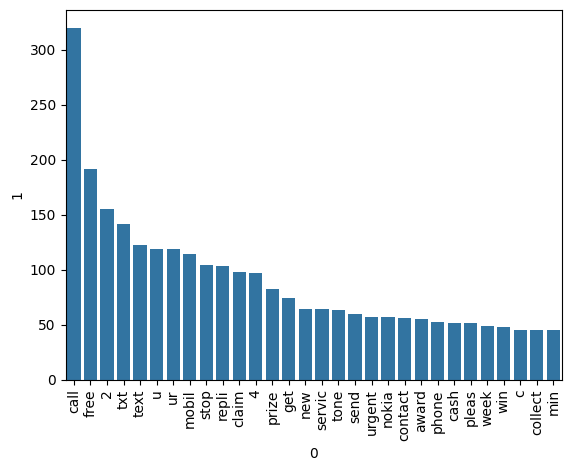

In [90]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation=90)

In [91]:
ham_corpus = []
for msg in df[df['label'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
        

In [92]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

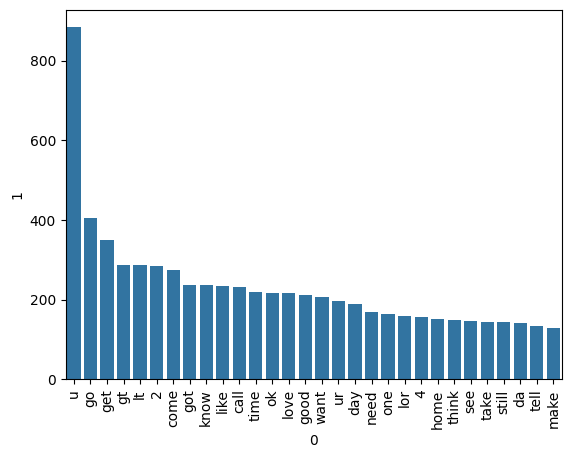

In [93]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation=90)

# Model Building

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [97]:
X = cv.fit_transform(df['transform_text']).toarray()

In [98]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5169, 6708))

In [99]:
y = df['label'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)   

In [104]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [112]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [113]:
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)   
bnb.fit(X_train, y_train)

BernoulliNB()

In [105]:
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)    
y_pred_bnb = bnb.predict(X_test)

In [106]:
accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_mnb), accuracy_score(y_test, y_pred_bnb)
confusion_matrix(y_test, y_pred_gnb), confusion_matrix(y_test, y_pred_mnb), confusion_matrix(y_test, y_pred_bnb)

(array([[792, 104],
        [ 20, 118]]),
 array([[871,  25],
        [ 12, 126]]),
 array([[893,   3],
        [ 28, 110]]))

In [107]:
print("GaussianNB Accuracy: ", accuracy_score(y_test, y_pred_gnb))
print("MultinomialNB Accuracy: ", accuracy_score(y_test, y_pred_mnb))   
print("BernoulliNB Accuracy: ", accuracy_score(y_test, y_pred_bnb))

GaussianNB Accuracy:  0.8800773694390716
MultinomialNB Accuracy:  0.9642166344294004
BernoulliNB Accuracy:  0.9700193423597679


In [108]:
print("GaussianNB Confusion Matrix: \n", confusion_matrix(y_test, y_pred_gnb))
print("MultinomialNB Confusion Matrix: \n", confusion_matrix(y_test, y_pred_mnb))
print("BernoulliNB Confusion Matrix: \n", confusion_matrix(y_test, y_pred_bnb))

GaussianNB Confusion Matrix: 
 [[792 104]
 [ 20 118]]
MultinomialNB Confusion Matrix: 
 [[871  25]
 [ 12 126]]
BernoulliNB Confusion Matrix: 
 [[893   3]
 [ 28 110]]


In [109]:
print("GaussianNB Precision: ", precision_score(y_test, y_pred_gnb))
print("MultinomialNB Precision: ", precision_score(y_test, y_pred_mnb))
print("BernoulliNB Precision: ", precision_score(y_test, y_pred_bnb))

GaussianNB Precision:  0.5315315315315315
MultinomialNB Precision:  0.8344370860927153
BernoulliNB Precision:  0.9734513274336283


In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transform_text']).toarray()

In [135]:
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)    
y_pred_bnb = bnb.predict(X_test)

In [136]:
confusion_matrix(y_test, y_pred_gnb), confusion_matrix(y_test, y_pred_mnb), confusion_matrix(y_test, y_pred_bnb)

(array([[793, 103],
        [ 25, 113]]),
 array([[896,   0],
        [ 42,  96]]),
 array([[893,   3],
        [ 28, 110]]))

In [137]:
print("GaussianNB Accuracy: ", accuracy_score(y_test, y_pred_gnb))
print("MultinomialNB Accuracy: ", accuracy_score(y_test, y_pred_mnb))   
print("BernoulliNB Accuracy: ", accuracy_score(y_test, y_pred_bnb))

GaussianNB Accuracy:  0.8762088974854932
MultinomialNB Accuracy:  0.9593810444874274
BernoulliNB Accuracy:  0.9700193423597679


In [138]:
print("GaussianNB Precision: ", precision_score(y_test, y_pred_gnb))
print("MultinomialNB Precision: ", precision_score(y_test, y_pred_mnb))
print("BernoulliNB Precision: ", precision_score(y_test, y_pred_bnb))

GaussianNB Precision:  0.5231481481481481
MultinomialNB Precision:  1.0
BernoulliNB Precision:  0.9734513274336283


In [139]:
# as multinomialNB is giving the best accuracy and precision, we will use it for prediction

In [120]:
# tfidf->multinomialNB

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [140]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [124]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [125]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [148]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9709864603481625, 1.0)

In [141]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8409090909090909
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9516129032258065


In [129]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [130]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
10,xgb,0.974855,0.951613
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
3,DT,0.936170,0.846154


## Model Improvement

### 1. Change max_features=3000 for tfidf(best improvement)

### 2. Scale features using MinMaxScaler (no need)

### 3. Adding extra features in input i.e. no_of_chars (no use)

### 4. Voting Calssifier combines best performing algos(no use)

### 5. Stacking (no use)

In [142]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [143]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [144]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [145]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,KN,0.900387,1.000000,0.900387,1.000000
1,NB,0.959381,1.000000,0.959381,1.000000
2,RF,0.971954,1.000000,0.971954,1.000000
3,ETC,0.972921,0.982456,0.972921,0.982456
4,SVC,0.972921,0.974138,0.972921,0.974138
5,xgb,0.974855,0.951613,0.974855,0.951613
6,LR,0.951644,0.940000,0.951644,0.940000
7,GBDT,0.952611,0.923810,0.952611,0.923810
8,BgC,0.958414,0.862595,0.958414,0.862595
9,DT,0.936170,0.846154,0.935203,0.838095


### Voting Classifier

In [149]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [150]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [151]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [152]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [153]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [154]:
from sklearn.ensemble import StackingClassifier

In [155]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [156]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))